In [ ]:
pip install pygame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd drive/MyDrive/Homework/EPS/EPS\ 109/Project

In [4]:
import numpy as np
import pygame as py
import os, sys
import matplotlib.pyplot as plt
from utils import *
from IPython.display import display, clear_output
from matplotlib.animation import FFMpegWriter
os.environ["SDL_VIDEODRIVER"] = "dummy"

pygame 2.1.2 (SDL 2.0.16, Python 3.7.15)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [7]:
# defining colors
BLACK = (0, 0, 0)
RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)
WHITE = (255, 255, 255)

## Simulation 1

This includes $\rm C_R$ = 0 and $\rm C_R$ = 1.

In [13]:
FPS = 120
dt = 1/FPS
tlim = 15 # 15 seconds
Niter = int(tlim//dt)

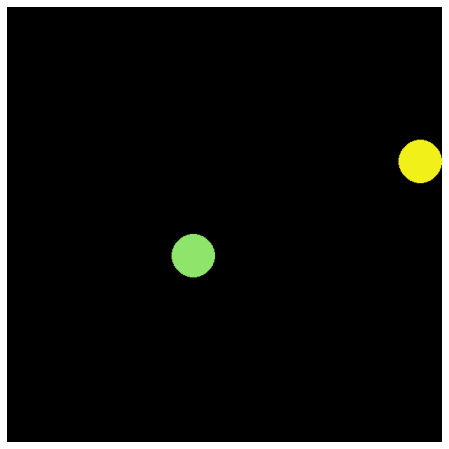

In [12]:
py.init()
WIDTH = HEIGHT = 600
WINDOW = py.display.set_mode((WIDTH, HEIGHT))
py.display.set_caption('Particle Simulation')

V = np.array([45.0, 45.0])
acc = np.zeros(2)
pos0 = np.array([WIDTH//2, HEIGHT//2],dtype='float')
p0 = Particle(pos0, np.zeros(2), acc, 30, 30, np.random.randint(0, 255, 3))
p1 = Particle([35, 35], V, acc, 30, 30, np.random.randint(0, 255, 3))

box = Box(dt, size=WIDTH, particles=[p0, p1], elasticity=1.0)

run = True
clock = py.time.Clock()
t = 0

# plotting settings
metadata = dict(title='Nd Body simulation', artist='Matplotlib', comment='simu 1')
writer = FFMpegWriter(fps=FPS, metadata=metadata)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)

with writer.saving(fig, "Simulation1.mp4", dpi=300):
  # to draw : 
  while run:
      clock.tick(FPS)
      WINDOW.fill(BLACK)
      
      for p in box.particles:
          py.draw.circle(WINDOW, p.color, p.get_pos(), p.radius)
      
      # Stopping conditions
      for event in py.event.get():
          if event.type == py.QUIT:
              run = False
      if t >= tlim:
          run = False
      t += dt

      box.update()
      display_surface = py.display.get_surface()
      display_surface.blit(py.transform.flip(display_surface, False, True), 
                          dest=(0, 0))
      

      # convert image so it can be displayed in OpenCV
      view = py.surfarray.array3d(WINDOW)
      # convert from (width, height, channel) to (height, width, channel)
      view = view.transpose([1, 0, 2])
      ax.cla()
      ax.imshow(view)
      ax.axis('off')
      display(fig)
      clear_output(wait = True)
      writer.grab_frame()

      py.display.update()

In [ ]:
py.init()
WIDTH = HEIGHT = 600
WINDOW = py.display.set_mode((WIDTH, HEIGHT))
py.display.set_caption('Particle Simulation')

V = np.array([45.0, 45.0])
acc = np.zeros(2)
pos0 = np.array([WIDTH//2, HEIGHT//2],dtype='float')
p0 = Particle(pos0, np.zeros(2), acc, 30, 30, np.random.randint(0, 255, 3))
p1 = Particle([35, 35], V, acc, 30, 30, np.random.randint(0, 255, 3))

box = Box(dt, size=WIDTH, particles=[p0, p1], elasticity=0.0)

run = True
clock = py.time.Clock()
t = 0

# plotting settings
metadata = dict(title='Nd Body simulation', artist='Matplotlib', comment='simu 1')
writer = FFMpegWriter(fps=FPS, metadata=metadata)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)

with writer.saving(fig, "Simulation1_2.mp4", dpi=300):
  # to draw : 
  while run:
      clock.tick(FPS)
      WINDOW.fill(BLACK)
      
      for p in box.particles:
          py.draw.circle(WINDOW, p.color, p.get_pos(), p.radius)
      
      # Stopping conditions
      for event in py.event.get():
          if event.type == py.QUIT:
              run = False
      if t >= tlim:
          run = False
      t += dt

      box.update()
      display_surface = py.display.get_surface()
      display_surface.blit(py.transform.flip(display_surface, False, True), 
                          dest=(0, 0))
      

      # convert image so it can be displayed in OpenCV
      view = py.surfarray.array3d(WINDOW)
      # convert from (width, height, channel) to (height, width, channel)
      view = view.transpose([1, 0, 2])
      ax.cla()
      ax.imshow(view)
      ax.axis('off')
      display(fig)
      clear_output(wait = True)
      writer.grab_frame()

      py.display.update()

## Simulation 2

In [22]:
FPS = 120
dt = 1/FPS
tlim = 10 # 10 seconds
Niter = int(tlim//dt)

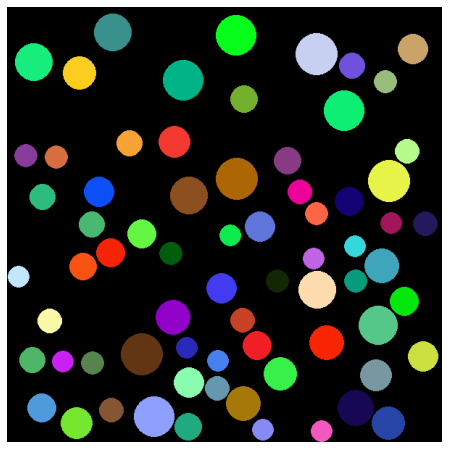

In [23]:
py.init()
WIDTH = HEIGHT = 600
WINDOW = py.display.set_mode((WIDTH, HEIGHT))
py.display.set_caption('Particle Simulation')


ps = gen_n_rand_particles(70, seed=10, minrad=15, maxrad=30, maxpos=WIDTH - 50)

box = Box(dt, size=WIDTH, particles=ps, elasticity=1.0)

run = True
clock = py.time.Clock()
t = 0

# plotting settings
metadata = dict(title='Nd Body simulation', artist='Matplotlib', comment='Test')
writer = FFMpegWriter(fps=FPS, metadata=metadata)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)

with writer.saving(fig, "Simulation2.mp4", dpi=250):
  # to draw : 
  while run:
      clock.tick(FPS)
      WINDOW.fill(BLACK)
      
      for p in box.particles:
          py.draw.circle(WINDOW, p.color, p.get_pos(), p.radius)
      
      # Stopping conditions
      for event in py.event.get():
          if event.type == py.QUIT:
              run = False
      if t >= tlim:
          run = False
      t += dt

      box.update()
      display_surface = py.display.get_surface()
      display_surface.blit(py.transform.flip(display_surface, False, True), 
                          dest=(0, 0))
      

      # convert image so it can be displayed in OpenCV
      view = py.surfarray.array3d(WINDOW)
      # convert from (width, height, channel) to (height, width, channel)
      view = view.transpose([1, 0, 2])
      ax.cla()
      ax.imshow(view)
      ax.axis('off')
      display(fig)
      clear_output(wait = True)
      plt.pause(0.001)
      writer.grab_frame()
      py.display.update()

## Simulation 3

In [23]:
FPS = 120
dt = 1/FPS
tlim = 20
Niter = int(tlim//dt)

In [ ]:
py.init()
CHANNELS = 3
WIDTH = HEIGHT = 600
WINDOW = py.display.set_mode((WIDTH, HEIGHT))
py.display.set_caption('Particle Simulation')


ps = gen_n_rand_particles(25, seed=10, minrad=20,
                          minpos=400, maxpos=WIDTH - 50)

box = Box(dt, size=WIDTH, particles=ps, elasticity=0.6)


run = True
clock = py.time.Clock()
t = 0

# plotting settings
metadata = dict(title='Nd Body simulation', artist='Matplotlib', comment='Test')
writer = FFMpegWriter(fps=FPS, metadata=metadata)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)

with writer.saving(fig, "Nbody_simu.mp4", dpi=200):
  # to draw : 
  while run:
      clock.tick(FPS)
      WINDOW.fill(BLACK)
      
      for p in box.particles:
          py.draw.circle(WINDOW, p.color, p.get_pos(), p.radius)
      
      # Stopping conditions
      for event in py.event.get():
          if event.type == py.QUIT:
              run = False
      if t >= tlim:
          run = False
      t += dt

      if (t > 10.0):
        box.change_a(np.zeros(2))

      box.update()
      display_surface = py.display.get_surface()
      display_surface.blit(py.transform.flip(display_surface, False, True), 
                          dest=(0, 0))
      

      # convert image so it can be displayed in OpenCV
      view = py.surfarray.array3d(WINDOW)
      # convert from (width, height, channel) to (height, width, channel)
      view = view.transpose([1, 0, 2])
      ax.cla()
      ax.imshow(view)
      ax.axis('off')
      display(fig)
      clear_output(wait = True)
      writer.grab_frame()
      py.display.update()

## Simulation 4

In [ ]:
FPS = 120
dt = 1/FPS
tlim = 30 # 30 seconds
Niter = int(tlim//dt)

In [ ]:
py.init()
WIDTH = 300
HEIGHT = 800
WINDOW = py.display.set_mode((WIDTH, HEIGHT))
py.display.set_caption('Particle Simulation')


V = np.array([0.0, -10.0])
acc = np.array([0.0, -9.8])
pos0 = np.array([WIDTH//2, HEIGHT//2],dtype='float')
p0 = Particle(pos0, V, acc, 50, 50, RED)
p1 = Particle(pos0 + [0, 100], V, acc, 40, 40, BLUE)
p2 = Particle(pos0 + [0, 180], V, acc, 30, 30, GREEN)
p3 = Particle(pos0 + [0, 240], V, acc, 20, 20, (255, 215, 0))
p4 = Particle(pos0 + [0, 280], V, acc, 10, 10, WHITE)
ps = np.array([p0, p1, p2, p3, p4])

box = Box(dt, size=WIDTH, particles=ps, elasticity=0.6)


run = True
clock = py.time.Clock()
t = 0

# plotting settings
metadata = dict(title='Nd Body simulation', artist='Matplotlib', comment='Test')
writer = FFMpegWriter(fps=FPS, metadata=metadata)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)

with writer.saving(fig, "Simulation4.mp4", dpi=300):
  # to draw : 
  while run:
      clock.tick(FPS)
      WINDOW.fill(BLACK)
      
      for j, p in enumerate(box.particles):
        py.draw.circle(WINDOW, p.color, p.get_pos(), p.radius)
        vel = p.get_vel()
        vtext = textfont.render(f'V = {vel[0].round(1), vel[1].round(1)}', 1, p.color)
        vtext = py.transform.flip(vtext, False, True)
        WINDOW.blit(vtext, (10, HEIGHT - 25*(j + 1)))

      
      # Stopping conditions
      for event in py.event.get():
          if event.type == py.QUIT:
              run = False
      if t >= tlim:
          run = False
      t += dt

      box.update()
      display_surface = py.display.get_surface()
      display_surface.blit(py.transform.flip(display_surface, False, True), 
                          dest=(0, 0))
      

      # convert image so it can be displayed in OpenCV
      view = py.surfarray.array3d(WINDOW)
      # convert from (width, height, channel) to (height, width, channel)
      view = view.transpose([1, 0, 2])
      ax.cla()
      ax.imshow(view)
      ax.axis('off')
      display(fig)
      clear_output(wait = True)
      writer.grab_frame()
      py.display.update()